# **CSST106 - Perception and Computer Vision**
# **MACHINE EXERCISE 4**

# **Esguerra, Nashrudin Maverick A. from BSCS-IS-4B**

# **Import liblaries**

# ***Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection***

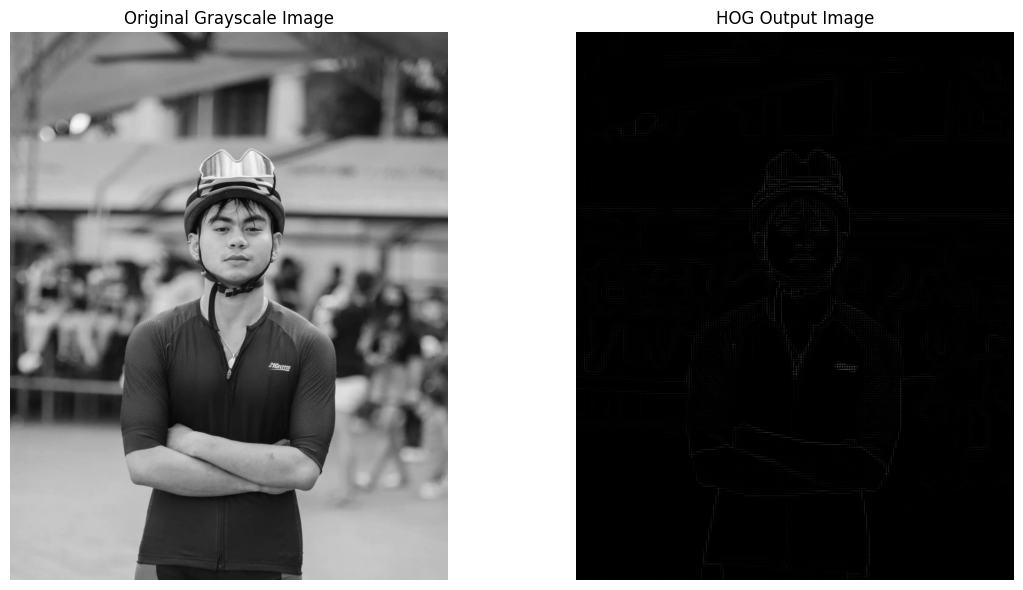

In [1]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('Nash.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply HOG descriptor
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Display the original grayscale image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.axis('off')
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

# Display the HOG image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.axis('off')
plt.title('HOG Output Image')
plt.imshow(hog_image, cmap='gray')

# Show the images
plt.tight_layout()
plt.show()



In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg


--2024-11-03 14:30:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.8MB/s    in 13s     

2024-11-03 14:30:29 (18.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-11-03 14:30:29--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

# ***Exercise 2: YOLO (You Only Look Once) Object Detection***

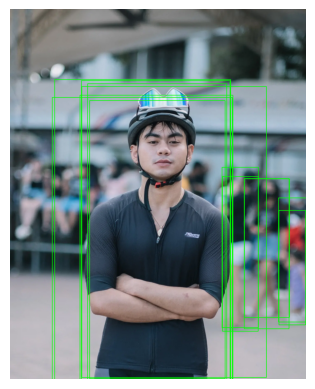

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model and configuration
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread('Nash.jpg')
height, width, channels = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Run forward pass for output
outs = net.forward(output_layers)

# Loop through each detection
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Get bounding box coordinates
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Draw bounding box
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detections using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


# ***Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow***

In [5]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-11-03 14:35:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-11-03 14:35:02 (20.2 MB/s) - ‘coco.names’ saved [625/625]



In [6]:
with open("/content/coco.names", "r") as f:
    class_names = f.read().splitlines()


In [7]:
# Download the SSD MobileNet V2 COCO model
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz


--2024-11-03 14:44:38--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.207, 74.125.139.207, 173.194.212.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   196MB/s    in 0.9s    

2024-11-03 14:44:39 (196 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03

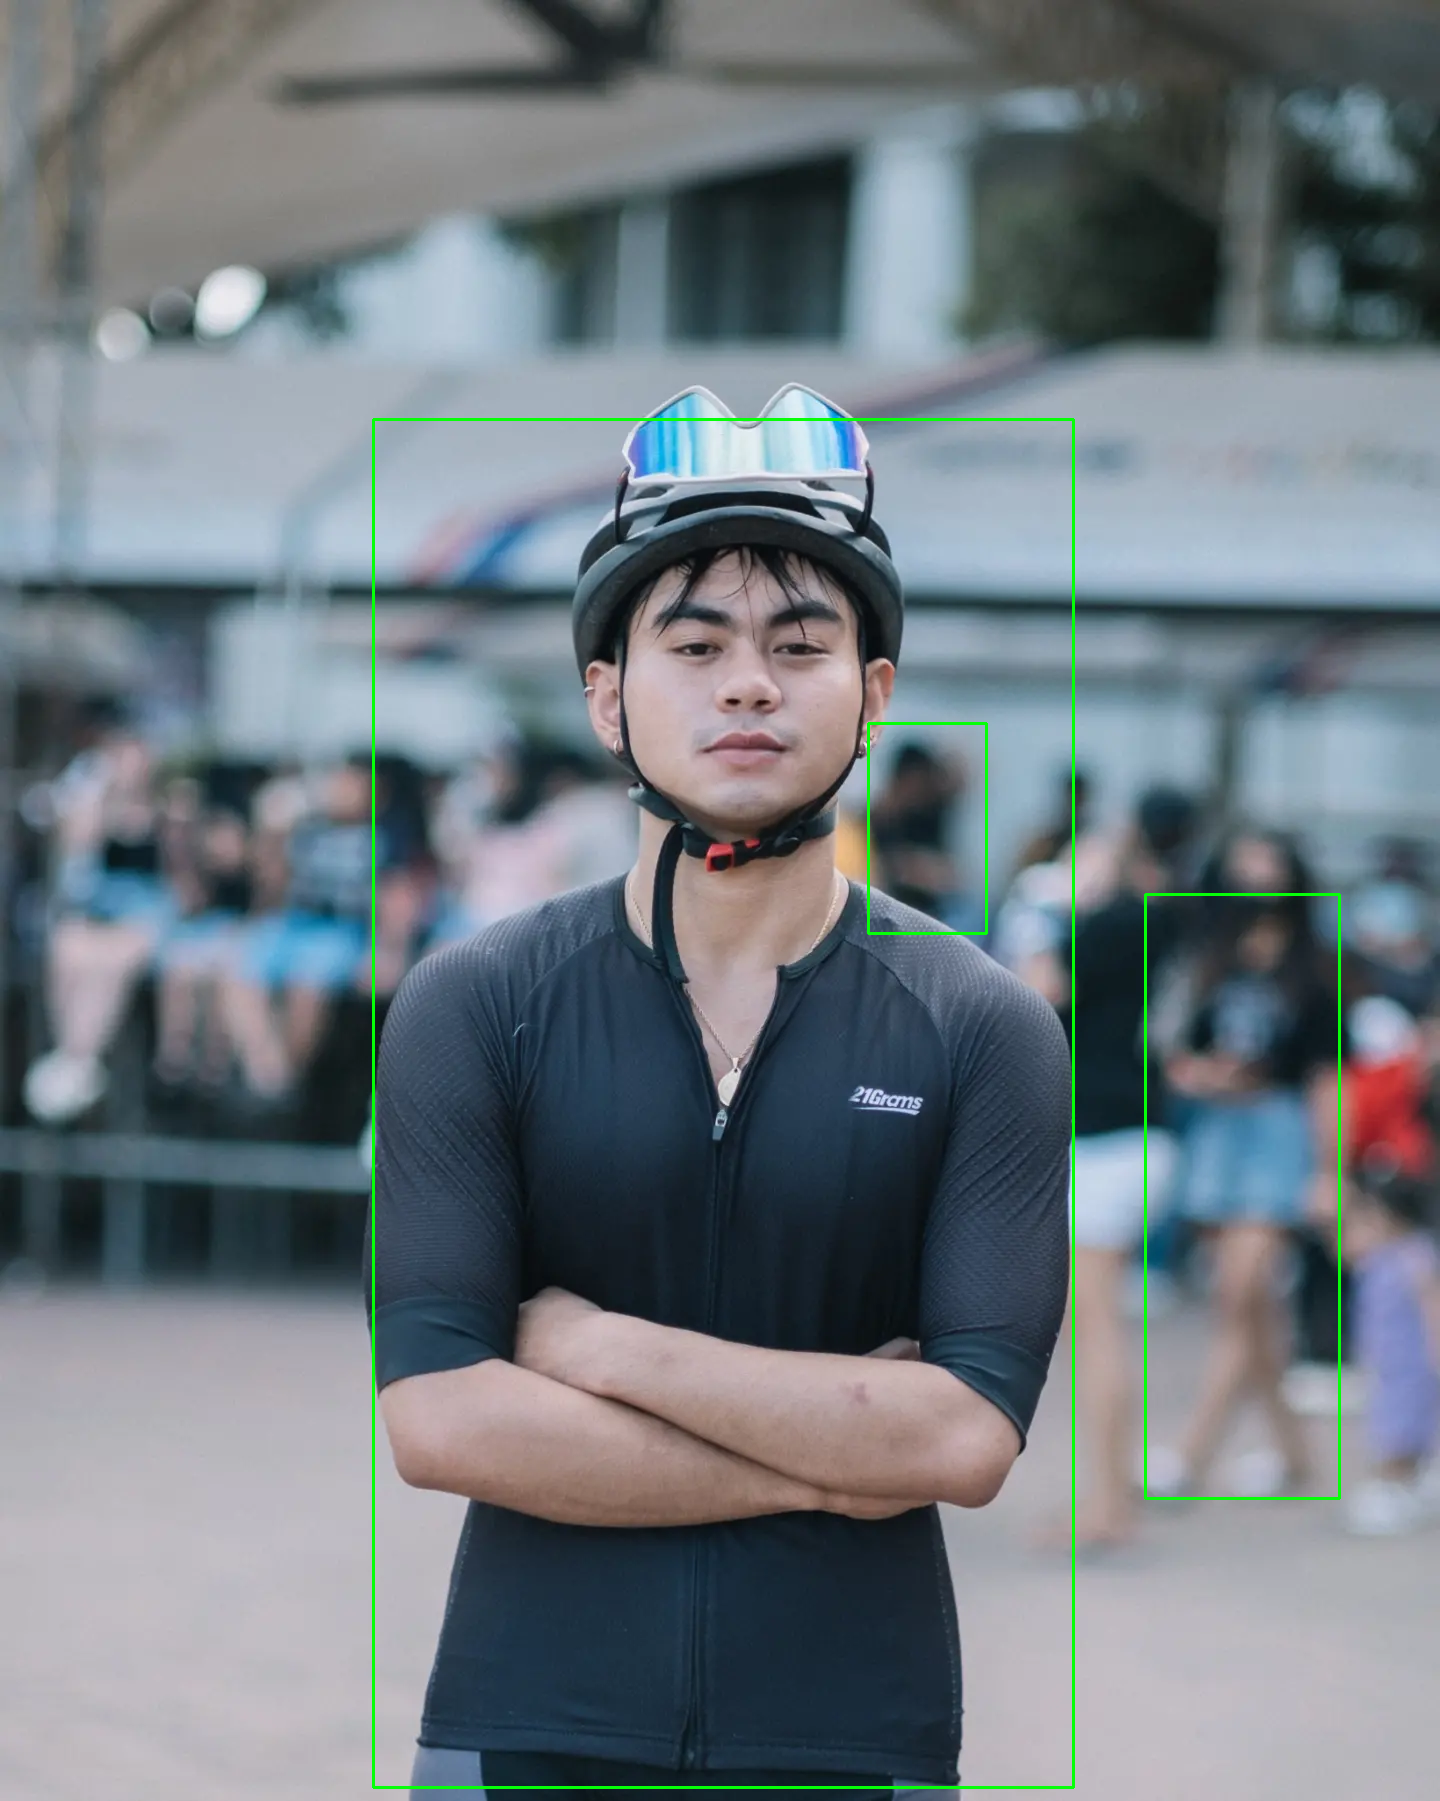

In [8]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Load the pre-trained SSD MobileNet model
model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')
infer = model.signatures['serving_default']  # Use the signature to get the detection function

# Load image
image_path = 'Nash.jpg'
image_np = cv2.imread(image_path)
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV format) to RGB

# Convert the image to uint8
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, axis=0), dtype=tf.uint8)

# Run the model and get detections
detections = infer(input_tensor)

# Visualize the bounding boxes
for i in range(int(detections['num_detections'].numpy()[0])):
    if detections['detection_scores'][0][i].numpy() > 0.5:
        # Get bounding box coordinates
        ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
        (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1],
                                      ymin * image_np.shape[0], ymax * image_np.shape[0])
        # Draw bounding box
        cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (6, 255, 8), 2)

# Convert the image back to BGR for displaying in OpenCV
image_np_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Display the image in Colab
cv2_imshow(image_np_bgr)  # Use cv2_imshow in Colab instead of cv2.imshow

# ***Exercise 4: Traditional vs. Deep Learning Object Detection Comparison***

In [12]:
import os
import cv2  # OpenCV for image processing
from skimage.feature import hog  # For HOG feature extraction
from skimage.io import imread  # For reading images
from sklearn.preprocessing import LabelEncoder  # For encoding labels
import numpy as np

# Define the HOG feature extraction function
def extract_hog_features(image_directory):
    features = []
    labels = []
    label_encoder = LabelEncoder()

    # Loop through each file in the directory
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Accept image formats
                img_path = os.path.join(root, file)
                img = imread(img_path, as_gray=True)  # Read image in grayscale

                # Resize the image if needed (for example, to 128x128)
                img = cv2.resize(img, (128, 128))

                # Extract HOG features
                hog_features = hog(
                    img,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    orientations=9,
                    block_norm='L2-Hys'
                )
                features.append(hog_features)

                # Use folder names or other criteria as labels
                label = os.path.basename(root)  # For example, using folder names as labels
                labels.append(label)

    # Convert labels to a numeric format
    labels = label_encoder.fit_transform(labels)
    return np.array(features), np.array(labels)

# Define your dataset directory
image_directory = '//content/drive/MyDrive/dataset_directory'  # Update to your actual path

# Extract features and labels
features, labels = extract_hog_features(image_directory)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Features shape: (0,)
Labels shape: (0,)


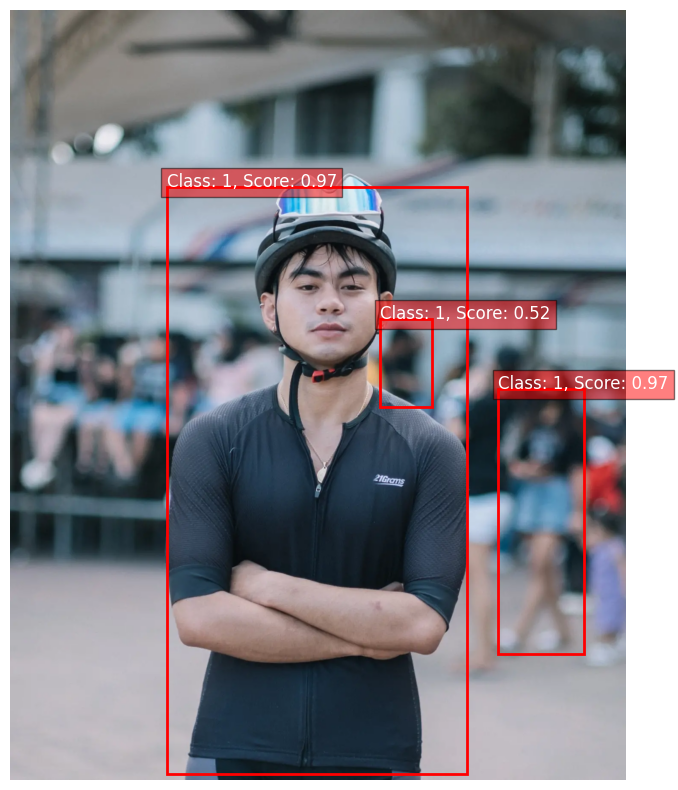

HOG-SVM Detection Time: 0.00 seconds
SSD/YOLO Detection Time: 0.22 seconds


In [13]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.patches import Rectangle

# Step 1: Load and preprocess the image
image_path = 'Nash.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

# Function to preprocess the image for SSD/YOLO models
def preprocess_image(image, target_size=(300, 300)):
    """Resize the image for SSD or YOLO model and ensure it is of type uint8."""
    image_resized = cv2.resize(image, target_size)
    image_resized = image_resized.astype(np.uint8)  # Ensure type is uint8
    image_expanded = np.expand_dims(image_resized, axis=0)  # Adding batch dimension
    return image_expanded

# Load the SSD model (update with the correct path if needed)
ssd_model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

# Preprocess the image and perform detection
input_image = preprocess_image(image_rgb)
infer = ssd_model.signatures['serving_default']
outputs = infer(tf.convert_to_tensor(input_image))

# Extract bounding boxes, scores, and class labels for SSD
boxes = outputs['detection_boxes'].numpy()[0]
scores = outputs['detection_scores'].numpy()[0]
classes = outputs['detection_classes'].numpy()[0]

# Step 2: Plot the image and bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
ax = plt.gca()

# Threshold to only show bounding boxes for objects with a high score
threshold = 0.5

# Get the image dimensions to map the bounding boxes to the original image size
image_height, image_width, _ = image_rgb.shape

for i in range(len(scores)):
    if scores[i] >= threshold:
        # Convert the normalized box coordinates to pixel coordinates
        ymin, xmin, ymax, xmax = boxes[i]
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)

        # Draw a rectangle on the image
        rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                         linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add the class label and score
        label = f"Class: {int(classes[i])}, Score: {scores[i]:.2f}"
        plt.text(xmin, ymin, label, color='white', fontsize=12,
                 bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

start_time = time.time()
# Predict using SVM (Assuming you've trained the model)
# predictions = svm.predict(hog_features)
end_time = time.time()
hog_svm_time = end_time - start_time

# Measure time for SSD/YOLO
start_time = time.time()
outputs = infer(tf.convert_to_tensor(input_image))  # SSD/YOLO detection
end_time = time.time()
ssd_yolo_time = end_time - start_time

# Example comparison output
print(f"HOG-SVM Detection Time: {hog_svm_time:.2f} seconds")
print(f"SSD/YOLO Detection Time: {ssd_yolo_time:.2f} seconds")
